# K-means clustering with Scikit-Learn

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters). Cluster analysis itself is not one specific algorithm, but the general task to be solved. It can be achieved by various algorithms that differ significantly in their notion of what constitutes a cluster and how to efficiently find them. Popular notions of clusters include groups with small distances among the cluster members, dense areas of the data space, intervals or particular statistical distributions. 

### k-means algorithm

K-Means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. 

The k-means algorithm takes a dataset X of N points as input, together with a parameter K specifying how many clusters to create. The output is a set of K cluster centroids and a labeling of X that assigns each of the points in X to a unique cluster. All points within a cluster are closer in distance to their centroid than they are to any other centroid.

### Clusteting with the iris dataset
Given the iris dataset, if we knew that there were 3 types of iris, but did not have access to a taxonomist to label them: we could try a clustering task: split the observations into well-separated group called clusters.

![kmeans](http://simplystatistics.org/wp-content/uploads/2014/02/kmeans.gif)

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
from sklearn import datasets
iris = datasets.load_iris()

In [20]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.rename(columns=lambda x: x[:-5], inplace=True)
iris_df['species'] = iris.target_names[iris.target]
#iris_df['target'] = iris.target
iris_df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
#sns.pairplot(iris_df, hue='species');

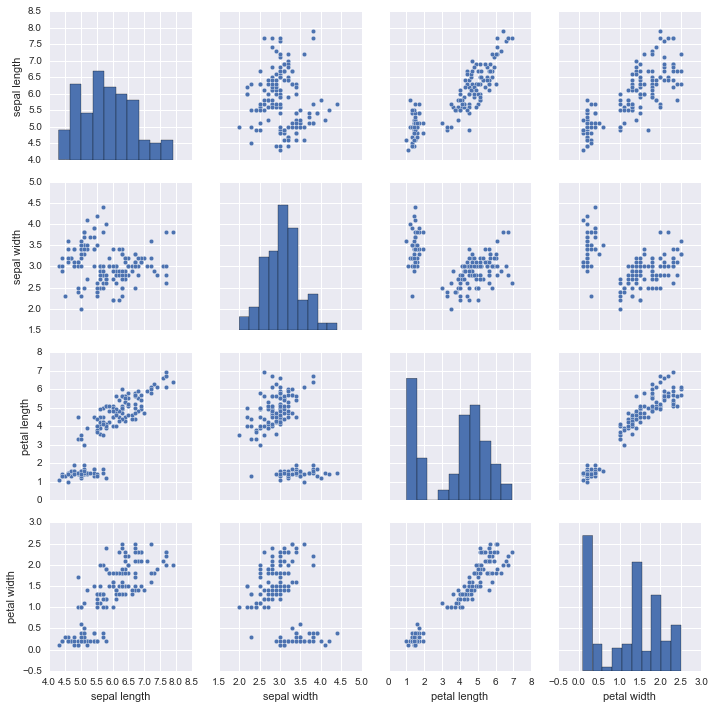

In [5]:
sns.pairplot(iris_df.ix[:,0:4]);

In [23]:
X_iris = iris.data
y_iris = iris.target

from sklearn.cluster import KMeans 
k_means = KMeans(n_clusters=2)
k_means.fit(X_iris)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [24]:
#Cluster centers
k_means.cluster_centers_

array([[ 6.30103093,  2.88659794,  4.95876289,  1.69587629],
       [ 5.00566038,  3.36037736,  1.56226415,  0.28867925]])

In [25]:
#Cluster labels
k_means.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
# Predictions
k_means.predict(np.array([5,2,2,0.5]).reshape(1,4))

array([1])

In [26]:
iris_df['cluster_labels'] = np.array(['A','B'])[k_means.labels_]

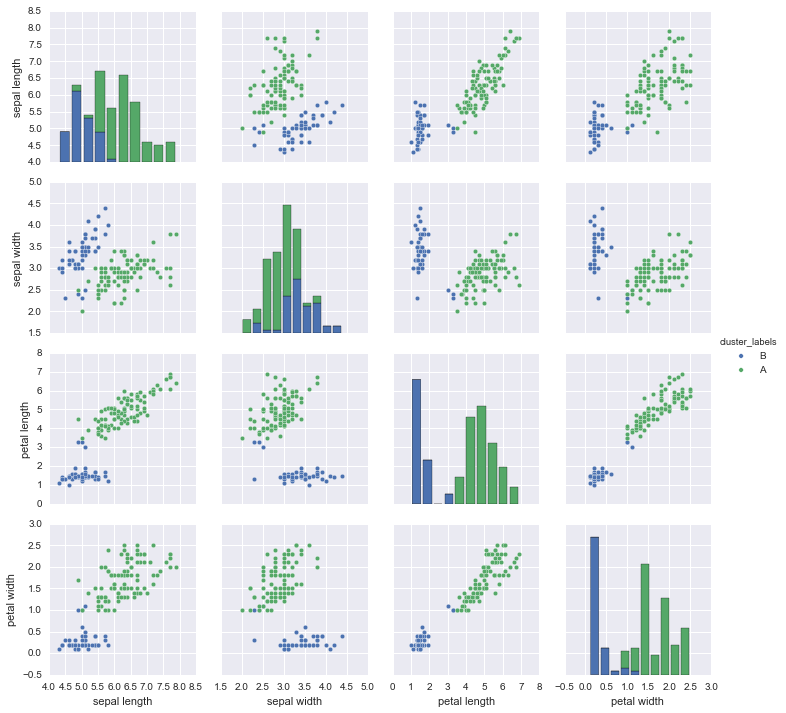

In [27]:
sns.pairplot(iris_df, hue='cluster_labels');

In [12]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()